# Problème de désabonnement pour le client de la banque

In [1]:
#pip install xgboost

In [2]:
#pip install scikit-plot

In [3]:
#conda install lightgbm

In [4]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

#Modele
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.ensemble import VotingClassifier

#GridSearch
import itertools
from matplotlib import rc,rcParams

#Métric
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import plot_roc_curve
from sklearn import datasets, metrics, model_selection, svm
import scikitplot as skplt


In [5]:
data = pd.read_csv('Churn_Modelling.csv')

In [6]:
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [7]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


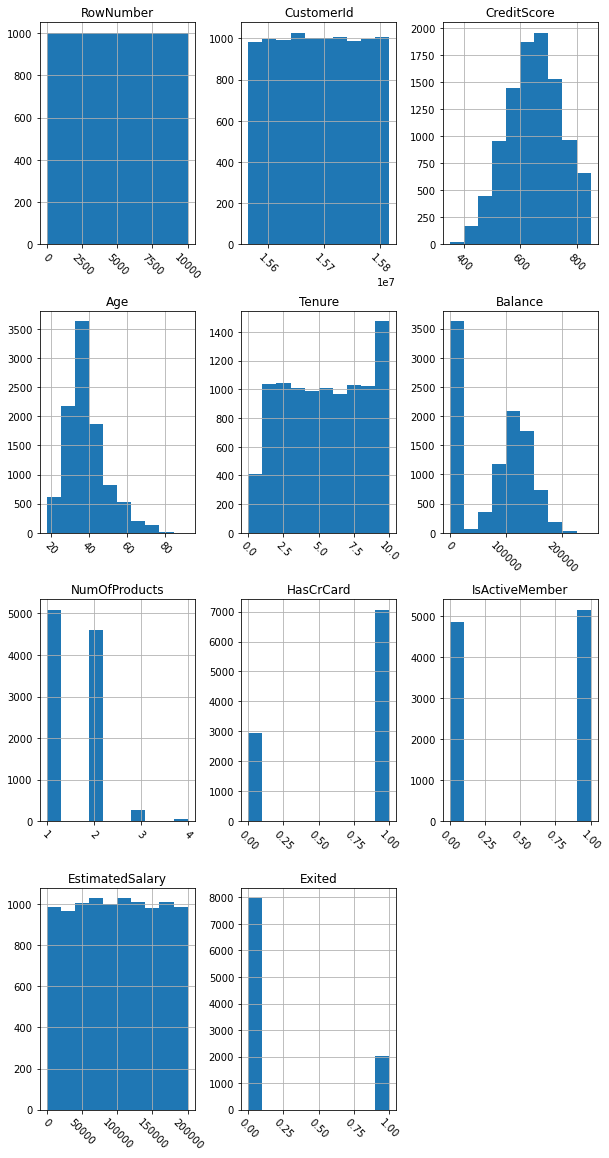

In [9]:
data.hist(figsize=(10,20), xrot=-45)
plt.show()

In [10]:
#vérifier les données manquantes
data.isnull().any()

RowNumber          False
CustomerId         False
Surname            False
CreditScore        False
Geography          False
Gender             False
Age                False
Tenure             False
Balance            False
NumOfProducts      False
HasCrCard          False
IsActiveMember     False
EstimatedSalary    False
Exited             False
dtype: bool

In [11]:
#statistiques des données
stats = data.describe()
stats

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


# L'analyse exploratoire des données

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


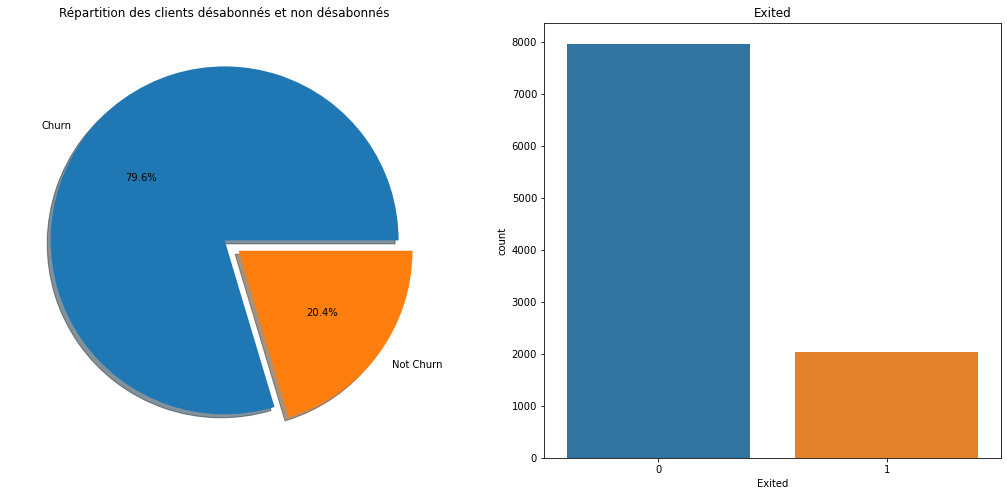

total0 Exited : 7963
total1 Exited : 2037


In [12]:
labels = 'Churn', 'Not Churn'
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Exited'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',labels=labels,ax=ax[0],shadow=True)
ax[0].set_title('Répartition des clients désabonnés et non désabonnés')
ax[0].set_ylabel('')
sns.countplot('Exited',data=data,ax=ax[1])
ax[1].set_title('Exited')
plt.show()

#Compté le nombre entre chaque variable 
compte = list(data['Exited'].value_counts().index)
for e in compte: 
    print('total{} Exited : {}'.format(e, len(data[data['Exited'] == e])))

In [13]:
data.groupby("Gender").agg({"Exited": "count"})
# Les femmes ont plus quitter la banque

,Exited
Gender,
Female,4543
Male,5457


In [14]:
data.groupby("Geography").agg({"Exited": "count"})
#L'Allemagne a plus quitter la banque

,Exited
Geography,
France,5014
Germany,2509
Spain,2477


In [15]:
#Regardons le résumé de Credit Score, Age, Tenure, Balance, Credit Card, Active member, Salary
data.groupby("Exited").agg(["min","mean","max"])

/var/folders/jq/sr5sftx56ps9pwjszndbw5600000gn/T/ipykernel_81916/2035283893.py:2: FutureWarning: ['Surname', 'Geography', 'Gender'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  data.groupby("Exited").agg(["min","mean","max"])


RowNumber                     CustomerId                          \
             min         mean    max        min          mean       max   
Exited                                                                    
0              2  5024.694964  10000   15565701  1.569117e+07  15815690   
1              1  4905.917526   9999   15565706  1.569005e+07  15815656   

       CreditScore                  Age  ... NumOfProducts HasCrCard  \
               min        mean  max min  ...           max       min   
Exited                                   ...                           
0              405  651.853196  850  18  ...             3         0   
1              350  645.351497  850  18  ...             4         0   

                     IsActiveMember               EstimatedSalary  \
            mean max            min      mean max             min   
Exited                                                              
0       0.707146   1              0  0.554565   1           90.07   
1       0.699067   1              0  0.360825   1           11.58   

                                  
                 mean        max  
Exited                            
0        99738.391772  199992.48  
1       101465.677531  199808.10  

[2 rows x 30 columns]

In [16]:
## Analyse de la relation entre les données catégorielles et la variable cible (Exited)

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

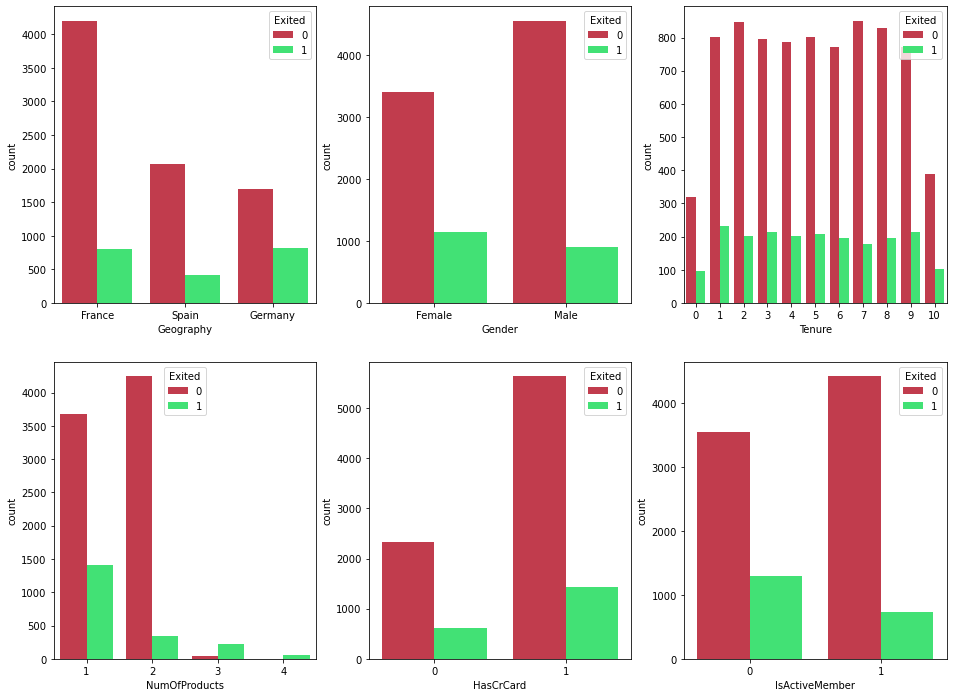

In [17]:
fig_data=['Geography', 'Gender', 'Tenure','NumOfProducts', 'HasCrCard', 
                  'IsActiveMember']
q=1
plt.figure(figsize=(16,12))
# Plot a grid with count plots of all categorical variables
for j in fig_data:
    plt.subplot(2,3,q)
    ax=sns.countplot(data[j],hue=data.Exited, palette=['#D7263D','#27FB6B'])
    plt.xlabel(j)
    q+=1
plt.show()

In [18]:
## Analyse de la relation entre les données numérique et la variable cible (Exited)

In [19]:
Num_data = data[[ 'Age', 'CreditScore', 'Balance', 'EstimatedSalary' ]]

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


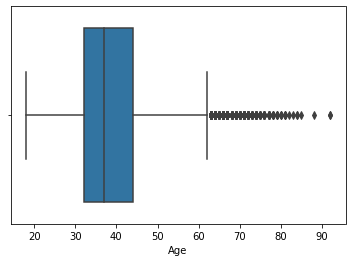

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


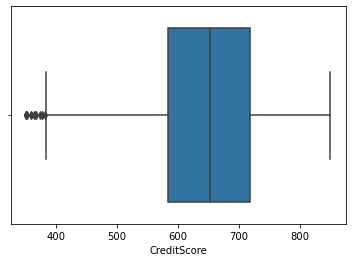

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


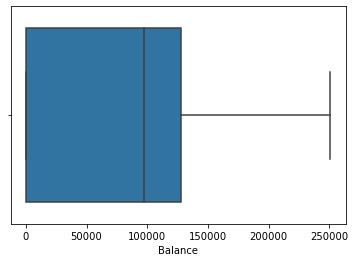

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


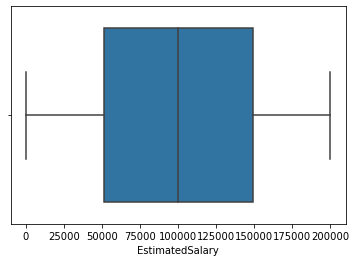

In [20]:
def viz_outliers(var):

    sns.boxplot(data[var])
    plt.show()
    
for i in Num_data:
    viz_outliers(i)

<AxesSubplot:xlabel='Exited', ylabel='EstimatedSalary'>

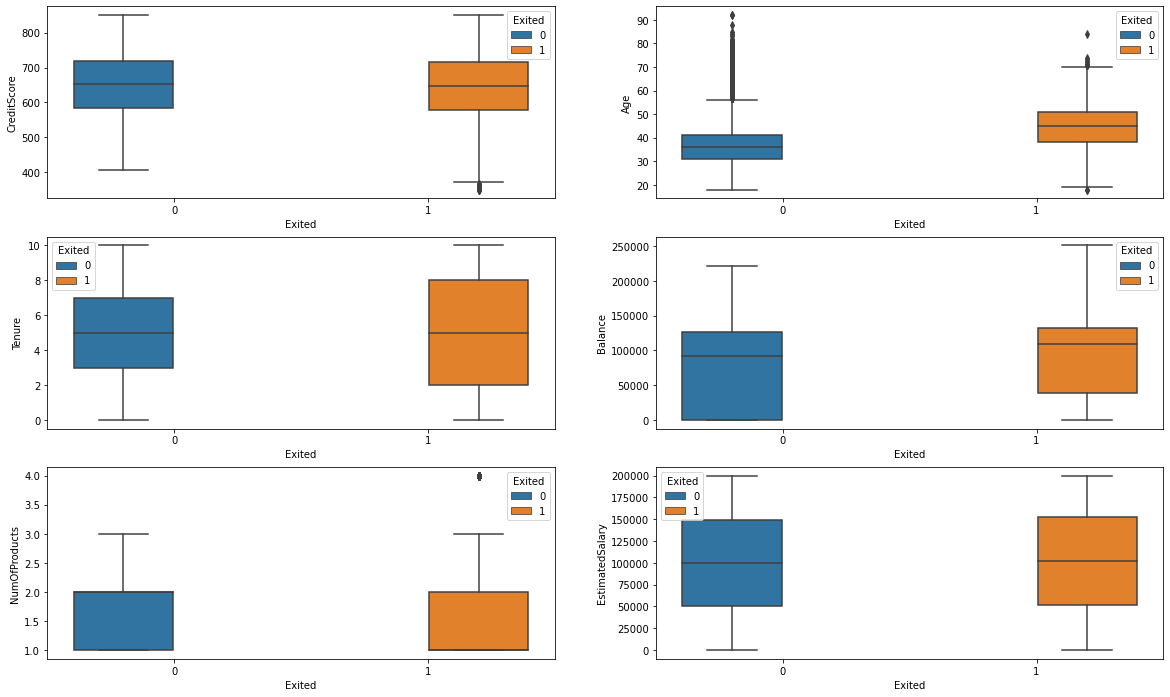

In [21]:
# # Graphique Boxplot pour l'analyse des observations aberrantes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = data, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = data , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = data, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = data, ax=axarr[2][1])

In [22]:
# Selection des valeurs abberantes
outliers = ['Age','CreditScore','NumOfProducts']

In [23]:
# créer une fonction pour supprimer les valeurs aberrantes
def outlier_removal(data,column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    point_low = q1 - 1.5 * iqr
    point_high = q3 + 1.5 * iqr
    cleaned_data = data.loc[(data[column] >  point_low) & (data[column] <  point_high)]
    return cleaned_data

In [24]:
# nettoyer le jeu de données en supprimant les valeurs aberrantes
data_cleaned = outlier_removal(outlier_removal(outlier_removal(data,'Age'),'CreditScore'),'NumOfProducts')

print(data.shape)
print(data_cleaned.shape)

(10000, 14)
(9516, 14)


In [25]:
list_corr = ['CreditScore' ,'Age' ,'Tenure' ,'Balance' ,'NumOfProducts' ,'EstimatedSalary' ,'Exited']

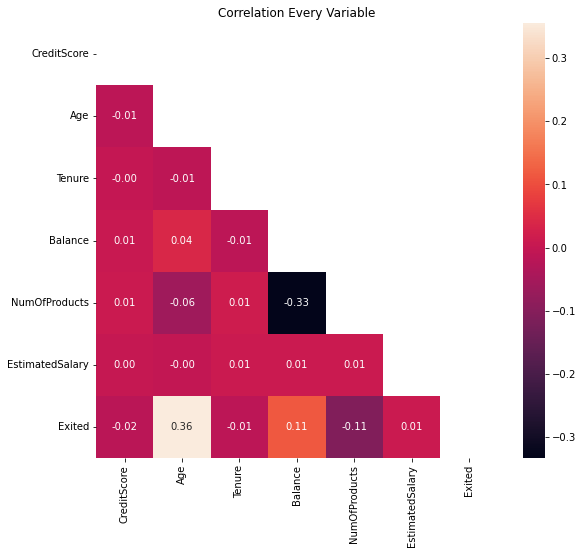

In [26]:
list_corr = data_cleaned[list_corr].corr()
mask = np.zeros_like(list_corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(9, 8))
ax = sns.heatmap(list_corr,mask=mask, 
                 annot=True, annot_kws={'size':10}, fmt=".2f")
plt.title("Correlation Every Variable")
plt.show()

# Analyser la relation entre la variable Age et la variable cible (Exited)

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/seaborn/axisgrid.py:156: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  figlegend = self._figure.legend(handles, labels, **kwargs)


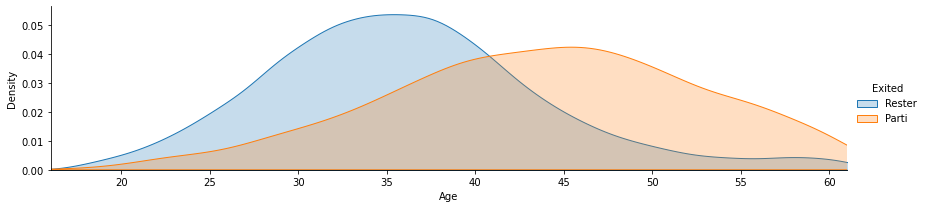

In [27]:
#visulaization relation between Age and Exited
FacetGrid = sns.FacetGrid(data_cleaned, hue='Exited', aspect=4)
FacetGrid.map(sns.kdeplot, 'Age', shade=True )
FacetGrid.set(xlim=(16, data_cleaned['Age'].max()))
FacetGrid.add_legend(labels = ['Rester', "Parti"])

In [28]:
data_cleaned.groupby(data_cleaned["Exited"])["Age"].mean()

Exited
0    36.089197
1    43.793583
Name: Age, dtype: float64

# FEATURE ENGINEERING

In [29]:
data_cleaned.drop(["RowNumber","CustomerId","Surname"], axis = 1 , inplace = True)
data_cleaned.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [30]:
# puisque la géographie est une donnée catégorique, permet de l'encoder "one-hot" en utilisant pd.get_dummies
data_cleaned = pd.get_dummies(data_cleaned, columns = ['Geography'])

# spuisque le genre est une donnée catégorique, étiquetez-le en tant: female = 1 and male = 0
def func(data_cleaned):
    d =[]
    for m in data_cleaned:
        if m =='Female':
            d.append(1)
        else:
            d.append(0)
    return d

data_cleaned['Gender'] = func(data_cleaned['Gender'])

In [31]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9516 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        9516 non-null   int64  
 1   Gender             9516 non-null   int64  
 2   Age                9516 non-null   int64  
 3   Tenure             9516 non-null   int64  
 4   Balance            9516 non-null   float64
 5   NumOfProducts      9516 non-null   int64  
 6   HasCrCard          9516 non-null   int64  
 7   IsActiveMember     9516 non-null   int64  
 8   EstimatedSalary    9516 non-null   float64
 9   Exited             9516 non-null   int64  
 10  Geography_France   9516 non-null   uint8  
 11  Geography_Germany  9516 non-null   uint8  
 12  Geography_Spain    9516 non-null   uint8  
dtypes: float64(2), int64(8), uint8(3)
memory usage: 845.7 KB


In [32]:
data_cleaned

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain
0,619,1,42,2,0.00,1,1,1,101348.88,1,1,0,0
1,608,1,41,1,83807.86,1,0,1,112542.58,0,0,0,1
2,502,1,42,8,159660.80,3,1,0,113931.57,1,1,0,0
3,699,1,39,1,0.00,2,0,0,93826.63,0,1,0,0
4,850,1,43,2,125510.82,1,1,1,79084.10,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,0,39,5,0.00,2,1,0,96270.64,0,1,0,0
9996,516,0,35,10,57369.61,1,1,1,101699.77,0,1,0,0
9997,709,1,36,7,0.00,1,0,1,42085.58,1,1,0,0
9998,772,0,42,3,75075.31,2,1,0,92888.52,1,0,1,0


# Train / Test Split

In [33]:
x = data_cleaned.drop('Exited', axis = 1) 
y = data_cleaned['Exited']

x_train, x_test, y_train, y_test = train_test_split(x,  y, test_size = 0.3, random_state = 42 )

# Modélisation

In [34]:
#KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier()
knn_model = knn.fit(x_train,y_train)
knn_model
pred = knn_model.predict(x_test)
knn_score = accuracy_score(y_test, pred)
print(classification_report(y_test, pred, digits=2))
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      0.94      0.87      2277
           1       0.25      0.08      0.12       578

    accuracy                           0.77      2855
   macro avg       0.53      0.51      0.49      2855
weighted avg       0.69      0.77      0.71      2855

Accuracy score of Logistic Regression model:  0.7670753064798599


In [36]:
#LogisticRegression

In [37]:
LR = LogisticRegression()
LR_model = LR.fit(x_train,y_train)
LR_model
pred = LR_model.predict(x_test)
LR_model = accuracy_score(y_test, pred)
print(classification_report(y_test, pred, digits=2))
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      2277
           1       0.50      0.09      0.16       578

    accuracy                           0.80      2855
   macro avg       0.66      0.54      0.52      2855
weighted avg       0.75      0.80      0.74      2855

Accuracy score of Logistic Regression model:  0.7978984238178634


In [38]:
#DecisionTreeClassifier

In [39]:
CART = DecisionTreeClassifier()
CART_model = CART.fit(x_train,y_train)
CART_model
pred = CART_model.predict(x_test)
CART_model = accuracy_score(y_test, pred)
print(classification_report(y_test, pred, digits=2))
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      2277
           1       0.48      0.47      0.47       578

    accuracy                           0.79      2855
   macro avg       0.67      0.67      0.67      2855
weighted avg       0.79      0.79      0.79      2855

Accuracy score of Logistic Regression model:  0.7884413309982486


In [40]:
#RandomForestClassifier

In [41]:
RF = RandomForestClassifier()
RF_model = RF.fit(x_train,y_train)
RF_model
pred = RF_model.predict(x_test)
RF_model = accuracy_score(y_test, pred)

print(classification_report(y_test, pred, digits=2))
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.92      2277
           1       0.76      0.43      0.55       578

    accuracy                           0.86      2855
   macro avg       0.81      0.70      0.73      2855
weighted avg       0.85      0.86      0.84      2855

Accuracy score of Logistic Regression model:  0.8570928196147111


In [42]:
#SVC

In [43]:
SVM = SVC()
SVM_model = SVM.fit(x_train,y_train)
SVM_model
pred = SVM_model.predict(x_test)
SVM_model = accuracy_score(y_test, pred)

print(classification_report(y_test, pred, digits=2))
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89      2277
           1       0.00      0.00      0.00       578

    accuracy                           0.80      2855
   macro avg       0.40      0.50      0.44      2855
weighted avg       0.64      0.80      0.71      2855

Accuracy score of Logistic Regression model:  0.7975481611208406


/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

In [44]:
#GradientBoostingClassifier

In [45]:
GBR = GradientBoostingClassifier()
GBR_model = GBR.fit(x_train,y_train)
pred = GBR_model.predict(x_test)
GBR_model = accuracy_score(y_test, pred)

print(classification_report(y_test, pred, digits=2))
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2277
           1       0.78      0.44      0.56       578

    accuracy                           0.86      2855
   macro avg       0.83      0.70      0.74      2855
weighted avg       0.85      0.86      0.85      2855

Accuracy score of Logistic Regression model:  0.8612959719789842


In [46]:
#XGBClassifier

In [47]:
XGB = XGBClassifier()
XGB_model = XGB.fit(x_train,y_train)
pred = XGB_model.predict(x_test)
XGB_model = accuracy_score(y_test, pred)

print(classification_report(y_test, pred, digits=2))
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      2277
           1       0.71      0.46      0.56       578

    accuracy                           0.85      2855
   macro avg       0.79      0.70      0.73      2855
weighted avg       0.84      0.85      0.84      2855

Accuracy score of Logistic Regression model:  0.852539404553415


In [48]:
#LGBMClassifier

In [49]:
lgbm = LGBMClassifier()
lgbm_model = lgbm.fit(x_train,y_train)
pred = lgbm_model.predict(x_test)

lgbm_model = accuracy_score(y_test, pred)

print(classification_report(y_test, pred, digits=2))
print("Accuracy score of Logistic Regression model: ", accuracy_score(y_test, pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2277
           1       0.74      0.45      0.56       578

    accuracy                           0.86      2855
   macro avg       0.81      0.71      0.74      2855
weighted avg       0.85      0.86      0.84      2855

Accuracy score of Logistic Regression model:  0.8570928196147111


# Rassemblement des modèle

In [50]:
model = VotingClassifier(estimators=[('KNeighborsClassifier', knn), ('LogisticRegression', LR), ('DecisionTreeClassifier', CART), ('RandomForestClassifier', RF),('SVC',SVM),('GradientBoostingClassifier',GBR),('XGBClassifier',XGB),('LGBMClassifier',lgbm)], voting='hard')
model.fit(x_train,y_train)
model.score(x_test,y_test)

0.8472854640980736

In [51]:
model_data =[['KNeighborsClassifier', knn_score],
             ['LogisticRegression', LR_model],
             ['DecisionTreeClassifier', CART_model], 
             ['RandomForestClassifier', RF_model],
             ['SVC',SVM_model],
             ['GradientBoostingClassifier',GBR_model],
             ['XGBClassifier',XGB_model],
             ['LGBMClassifier',lgbm_model]] 

indexes = [1,2,3,4,5,6,7,8]
columns_name = ['MODEL', 'accuracy_score']
ife = pd.DataFrame(data = model_data,index = indexes, columns = columns_name )
print(ife)

                        MODEL  accuracy_score
1        KNeighborsClassifier        0.767075
2          LogisticRegression        0.797898
3      DecisionTreeClassifier        0.788441
4      RandomForestClassifier        0.857093
5                         SVC        0.797548
6  GradientBoostingClassifier        0.861296
7               XGBClassifier        0.852539
8              LGBMClassifier        0.857093


# GridSearch

Nous allons effectuer un Grid Search pour optimiser les performances du modèle RandomForest & GradientBoosting

In [52]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

In [53]:
# Optimisation RandomForestClassifier

In [54]:
rf = RandomForestClassifier(random_state = 24)
param_grid = {'n_estimators': [50],
              'criterion': ['entropy', 'gini'],
              'bootstrap': [True],
              'max_depth': [6],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [2, 3, 5],
              'min_samples_split': [2, 3, 5]}
                                  
scoring_metric='recall'
rf.fit(x_train, y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_test, y_pred, digits=2))
print("Accuracy score of tuned RandomForestClassifier model: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2277
           1       0.77      0.43      0.56       578

    accuracy                           0.86      2855
   macro avg       0.82      0.70      0.74      2855
weighted avg       0.85      0.86      0.84      2855

Accuracy score of tuned RandomForestClassifier model:  0.8591943957968476


In [55]:
# Optimisation GradientBoostingClassifier

In [56]:
GBR = GradientBoostingClassifier(random_state = 24)
param_grid = {'n_estimators': [50],
              'criterion': ['entropy', 'gini'],
              'bootstrap': [True],
              'max_depth': [6],
              'max_features': ['auto','sqrt'],
              'min_samples_leaf': [2, 3, 5],
              'min_samples_split': [2, 3, 5]}
                                  
scoring_metric='recall'
GBR.fit(x_train, y_train)
y_pred = GBR.predict(x_test)
print(classification_report(y_test, y_pred, digits=2))
print("Accuracy score of tuned GradientBoostingClassifier model: ", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      2277
           1       0.78      0.44      0.56       578

    accuracy                           0.86      2855
   macro avg       0.83      0.70      0.74      2855
weighted avg       0.85      0.86      0.85      2855

Accuracy score of tuned GradientBoostingClassifier model:  0.8612959719789842


True Negatives:  2207
False Positives:  70
False Negatives:  326
True Positives:  252


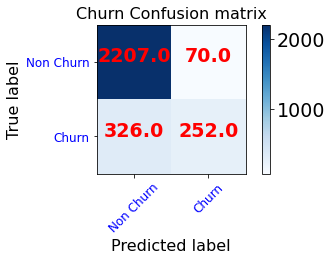

In [57]:
cfm = confusion_matrix(y_test, y_pred=y_pred)
plot_confusion_matrix(cfm, classes=['Non Churn','Churn'],
                      title='Churn Confusion matrix')


tn, fp, fn, tp = cfm.ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

# ROC Curve

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)
/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Functio

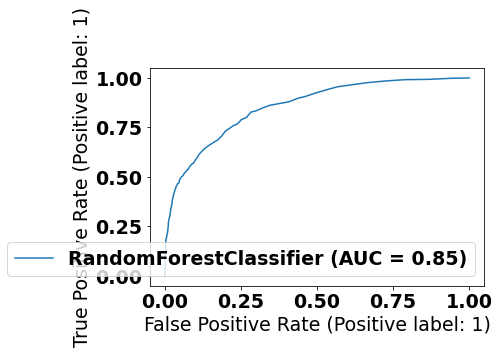

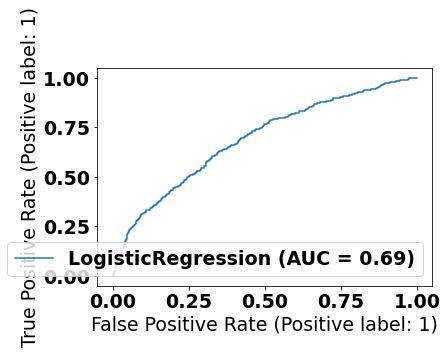

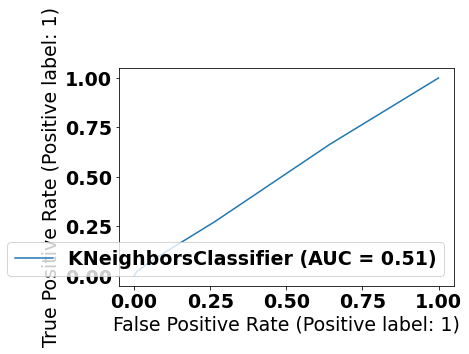

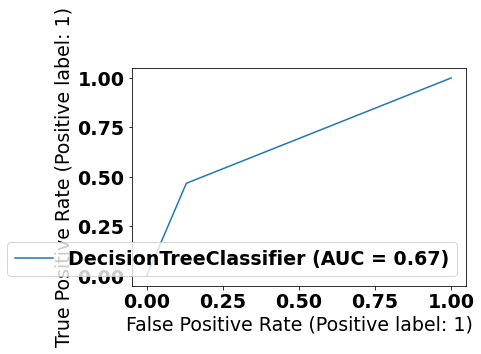

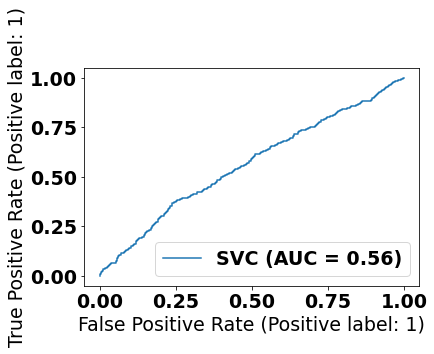

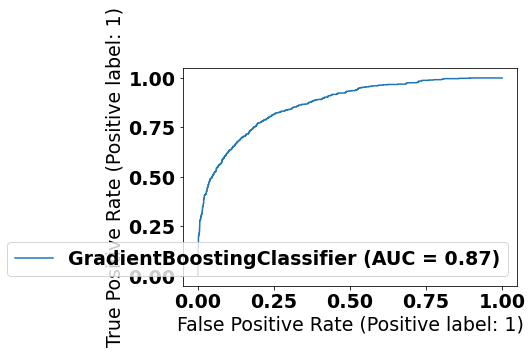

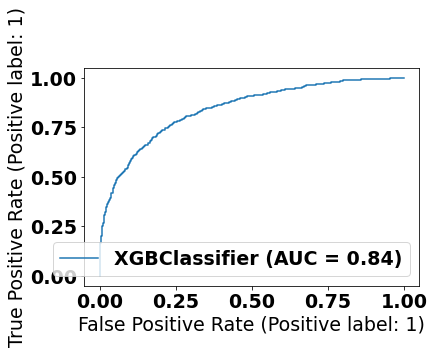

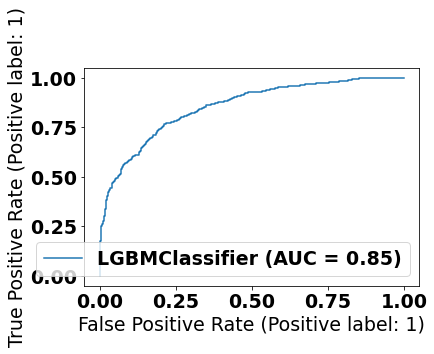

In [58]:
metrics.plot_roc_curve(rf, x_test, y_test)
metrics.plot_roc_curve(LR, x_test, y_test)
metrics.plot_roc_curve(knn, x_test, y_test)
metrics.plot_roc_curve(CART, x_test, y_test)
metrics.plot_roc_curve(SVM, x_test, y_test)
metrics.plot_roc_curve(GBR, x_test, y_test)
metrics.plot_roc_curve(XGB, x_test, y_test)
metrics.plot_roc_curve(lgbm, x_test, y_test)

/Users/elisetteossebi_Tmp/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


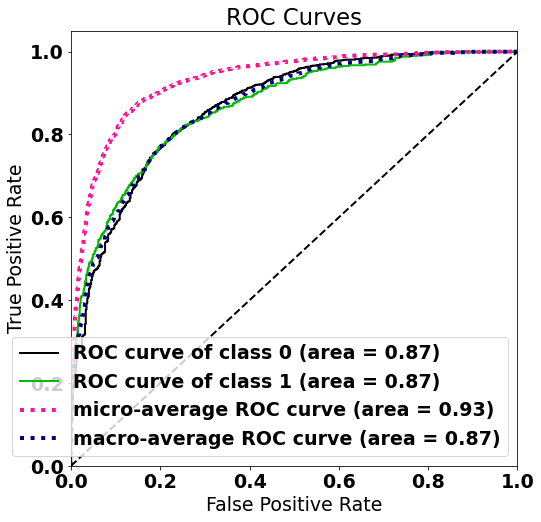

In [59]:
y_pred_proba = GBR.predict_proba(x_test)
skplt.metrics.plot_roc_curve(y_test, y_pred_proba, figsize=(8,8))

plt.show()

# feature importance 

In [60]:
# On récupère les importances pour chaque variable
GBR.feature_importances_

array([0.02393833, 0.01615511, 0.38915121, 0.00371334, 0.09899257,
       0.29798956, 0.00072043, 0.08899125, 0.02471058, 0.0004441 ,
       0.05423846, 0.00095507])

In [61]:
# On récupère les importances dans un DataFrame
features_imp = pd.DataFrame(
    data=np.asarray([x.columns, GBR.feature_importances_]).transpose(),
    columns=['Variable', 'Importance']
)
# On tri les importances dans l'ordre décroissant
features_imp = features_imp.sort_values('Importance', ascending=False)
features_imp

,Variable,Importance
2,Age,0.389151
5,NumOfProducts,0.29799
4,Balance,0.098993
7,IsActiveMember,0.088991
10,Geography_Germany,0.054238
8,EstimatedSalary,0.024711
0,CreditScore,0.023938
1,Gender,0.016155
3,Tenure,0.003713
11,Geography_Spain,0.000955


/var/folders/jq/sr5sftx56ps9pwjszndbw5600000gn/T/ipykernel_81916/3631127284.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_xticklabels(['{:,.0%}'.format(x) for x in np.linspace(0, 0.36, 10)], fontsize=12)


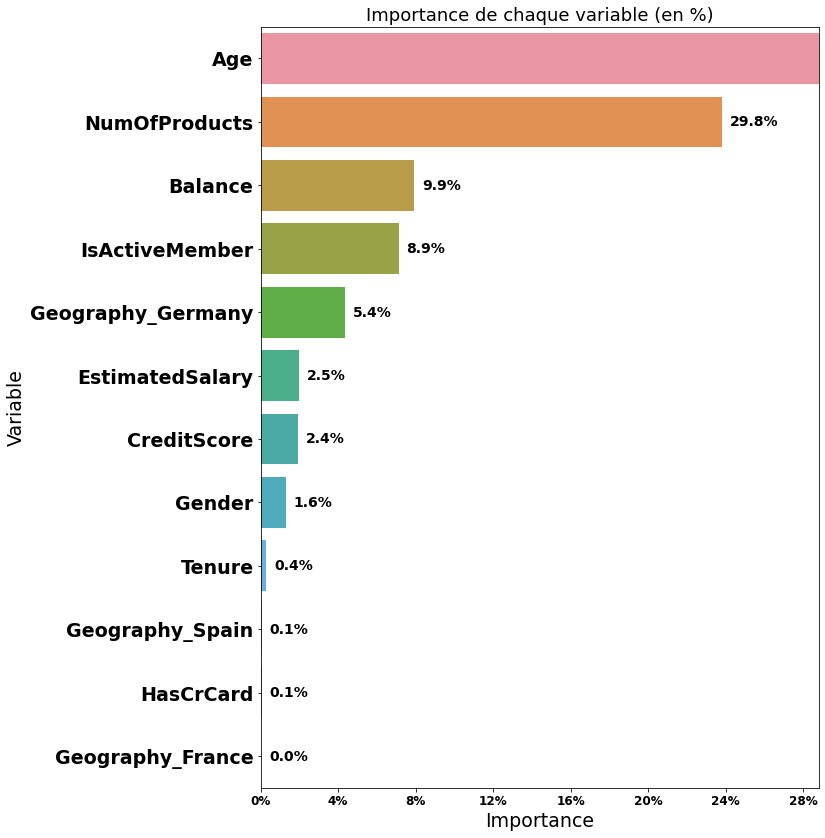

In [62]:
plt.figure(figsize=(10, 14))

graph = sns.barplot(x='Importance', y='Variable', data=features_imp.iloc[:20, :])
for p in graph.patches:
    graph.annotate(
        '{:2.1f}%'.format(p.get_width() * 100), (p.get_width() + 0.005, p.get_y() + p.get_height() / 2),
        ha='left', va='center',
        color= 'black',
        fontsize=14
    )

plt.gca().set_xlim(0, 0.36)
plt.gca().set_xticklabels(['{:,.0%}'.format(x) for x in np.linspace(0, 0.36, 10)], fontsize=12)
plt.title("Importance de chaque variable (en %)", fontsize=18)
plt.show()

# Conclusion